# Analisis Data Medis

# Data Understanding

## Preprocessing Data

Data disini didapatkan melalui link berikut  
https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

Dataset cirrhosis.csv adalah data medis yang berkaitan dengan penyakit hati (liver cirrhosis), khususnya pada pasien yang menjalani perawatan di rumah sakit. Dataset ini sering digunakan untuk prediksi kelangsungan hidup (survival prediction) dan analisis medis.

## Membaca Data

Langkah pertama adalah membaca dataset dan menampilkan beberapa baris awal untuk memahami struktur data.

In [25]:
import pandas as pd
# Baca data dari CSV
df = pd.read_csv("cirrhosis.csv")

# Tampilkan beberapa baris pertama
print(df.head())

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2  

## Visualisasi

Visualisasi dilakukan untuk memahami distribusi data, missing values, dan korelasi antar fitur.

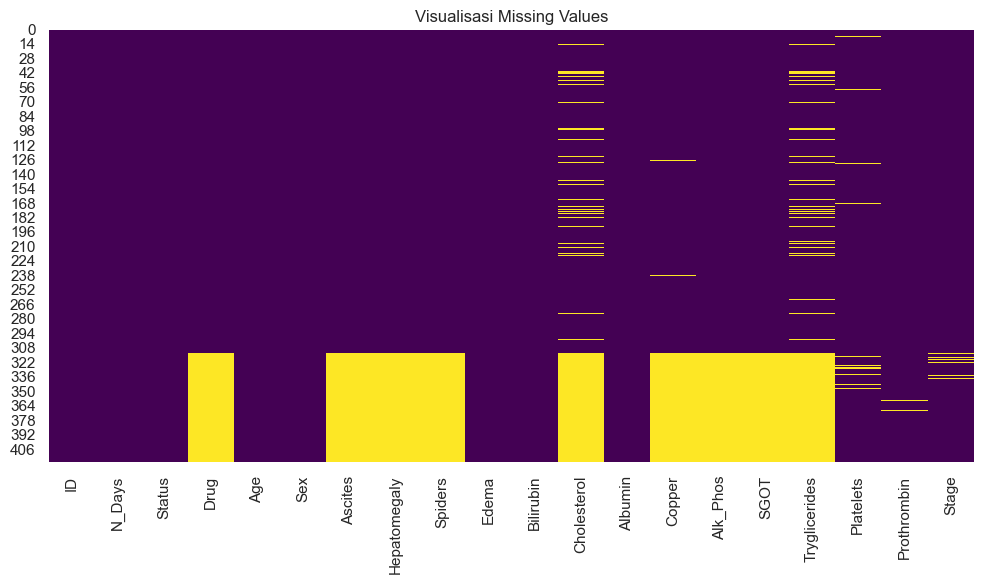

C:\Users\Tuhu Pangestu\AppData\Local\Temp\ipykernel_16572\3162751514.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stage', palette="Set2")


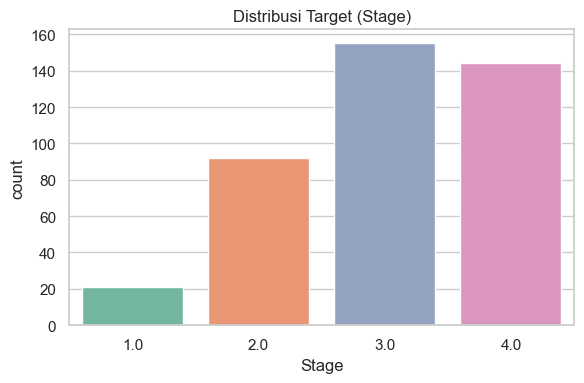

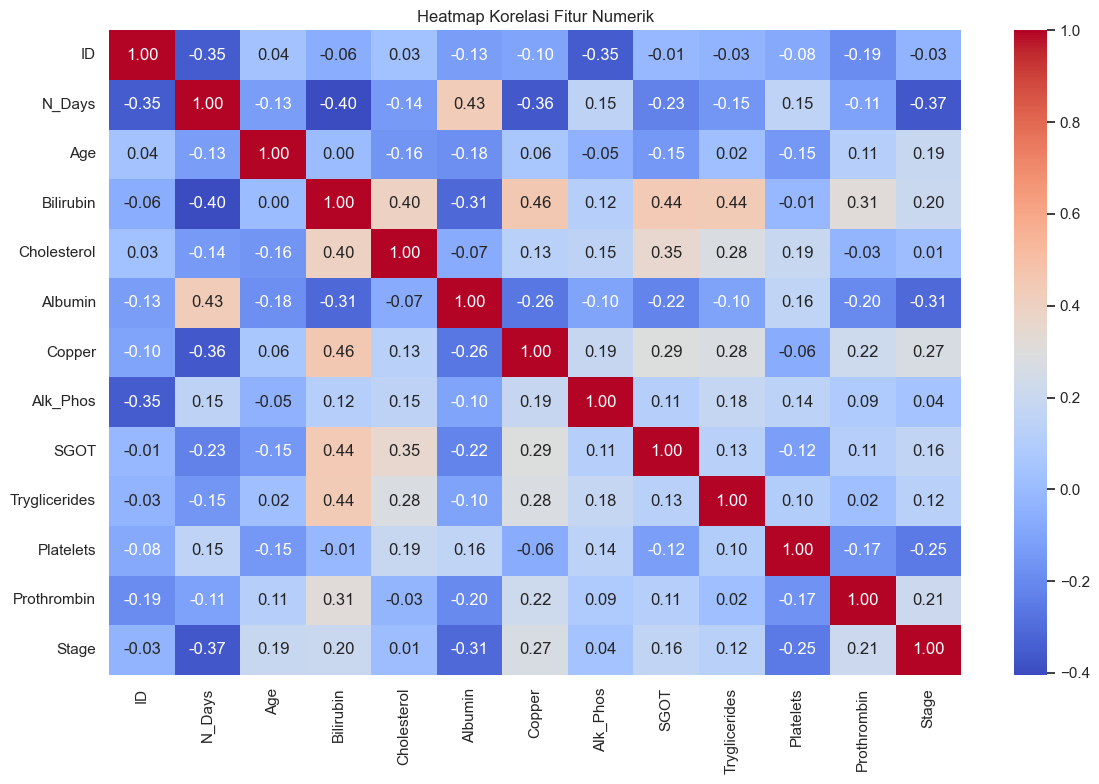

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data
df = pd.read_csv("cirrhosis.csv")

# Set style seaborn
sns.set(style="whitegrid")

# Visualisasi Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.tight_layout()
plt.show()

# Visualisasi distribusi target (jika kolom 'Stage' ada)
if 'Stage' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Stage', palette="Set2")
    plt.title("Distribusi Target (Stage)")
    plt.tight_layout()
    plt.show()

# Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

In [ ]:
# Baca dataset
file_path = "cirrhosis.csv"
df = pd.read_csv(file_path)

# Informasi umum dataset
print("📌 Info Dataset:")
print(df.info())

# Statistik deskriptif untuk data numerik
print("\n📊 Statistik Deskriptif:")
print(df.describe())

# Frekuensi kemunculan untuk variabel kategorikal
print("\n📈 Frekuensi Variabel Kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n", df[col].value_counts())

📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64

# Mendeteksi Outlier

Disini saya mendeteksi outlier menggunakan 2 metode yaitu local Outlier Factor (LOF) dan K-Nearest Neighbors(K-NN)

## Mendeteksi oulier menggunakan LOF

In [23]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1. Load dataset
df = pd.read_csv('cirrhosis.csv')

# 2. Pilih kolom sesuai header yang diberikan
cols = [
    "ID", "N_Days", "Status", "Drug", "Age", "Sex",
    "Ascites", "Hepatomegaly", "Spiders", "Edema",
    "Bilirubin", "Cholesterol", "Albumin", "Copper",
    "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
df_subset = df[cols]

# 3. Dari subset, pilih kolom numerik untuk LOF
numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
X = df_subset[numeric_cols]

# 4. Imputasi nilai NaN dengan rata-rata kolom
X_imputed = X.fillna(X.mean())

# 5. Inisiasi dan fit model LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_imputed)
scores = lof.negative_outlier_factor_

# 6. Tambahkan hasil ke DataFrame subset
df_subset['LOF_score'] = scores
df_subset['is_outlier'] = (y_pred == -1)

# 7. Filter hanya baris outlier dan urutkan berdasarkan skor
outliers = df_subset[df_subset['is_outlier']].sort_values('LOF_score')

# 8. Tampilkan hasil
print("Detected outliers:")
print(outliers)

Detected outliers:
      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
29    30     321      D          Placebo  15116   F       N            Y   
52    53    1000      D  D-penicillamine  24621   F       N            Y   
28    29    4509      C          Placebo  23331   F       N            N   
36    37     223      D  D-penicillamine  22546   F       Y            Y   
55    56    1847      D          Placebo  12279   F       N            Y   
23    24    4079      D  D-penicillamine  16261   M       N            Y   
205  206    2255      C  D-penicillamine  22642   F       N            N   
53    54    1434      D  D-penicillamine  14317   F       Y            Y   
42    43    4556      C  D-penicillamine  17850   F       N            N   
304  305    1216      C          Placebo  15730   F       N            Y   
57    58    4459      C  D-penicillamine  16279   M       N            N   
58    59    2224      D  D-penicillamine  14754   F       N          

## Mendeteksi outlier menggunakan K-NN

In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv('cirrhosis.csv')

# 2. Pilih fitur numerik
numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
X = df[numeric_cols].copy()

# 3. Imputasi nilai NaN
X.fillna(X.mean(), inplace=True)

# 4. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Hitung rata-rata jarak ke k tetangga terdekat
k = 20
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

# 6. Skor outlier: rata-rata jarak ke tetangga terdekat
outlier_scores = distances.mean(axis=1)
df['KNN_score'] = outlier_scores

# 7. Tentukan threshold (misal 5% tertinggi dianggap outlier)
threshold = np.percentile(outlier_scores, 95)
df['is_outlier'] = df['KNN_score'] > threshold

# 8. Tampilkan outlier
outliers = df[df['is_outlier']].sort_values(by='KNN_score', ascending=False)
print(outliers[['KNN_score', 'is_outlier'] + numeric_cols])


     KNN_score  is_outlier  N_Days    Age  Bilirubin  Cholesterol  Albumin  \
74    7.634211        True    1191  15895       17.1        674.0     2.53   
190   7.326208        True     216  19246       24.5       1092.0     3.35   
165   7.009484        True    2721  15105        5.7       1480.0     3.26   
324   6.342478        True    4795  12419        1.8          NaN     3.24   
17    5.902285        True     131  19698       11.4        178.0     2.80   
55    5.783596        True    1847  12279        1.1        498.0     3.80   
129   5.767484        True    1413  16154       17.4       1775.0     3.43   
22    5.718094        True     264  20442       17.4        395.0     2.94   
106   5.716930        True    3388  22836        0.6        212.0     4.03   
280   5.391823        True      41  24064       17.9        175.0     2.10   
246   5.266407        True     732  15056        6.1       1712.0     2.83   
85    5.109141        True    1657  19270        5.0       1600.

# Data Modeling

## Mengklasifikasi data menggunakan algoritma klasifikasi Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('cirrhosis.csv')

df['Status_binary'] = df['Status'].map({'C': 0, 'D': 1})
df = df.dropna(subset=['Status_binary'])


numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
categorical_cols = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]


X = df[numeric_cols + categorical_cols].copy()

X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])


X_encoded = pd.get_dummies(X, drop_first=True)

y = df['Status_binary']
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Censored','Died'])

print("Confusion Matrix:")
print(pd.DataFrame(
    cm,
    index=['Actual_Censored','Actual_Died'],
    columns=['Pred_Censored','Pred_Died']
))
print("\nClassification Report:")
print(report)


Confusion Matrix:
                 Pred_Censored  Pred_Died
Actual_Censored             59          6
Actual_Died                 18         35

Classification Report:
              precision    recall  f1-score   support

    Censored       0.77      0.91      0.83        65
        Died       0.85      0.66      0.74        53

    accuracy                           0.80       118
   macro avg       0.81      0.78      0.79       118
weighted avg       0.81      0.80      0.79       118



## Evaluasi

Model Gaussian Naive Bayes yang digunakan untuk memprediksi status pasien sirosis menunjukkan performa yang cukup baik dengan tingkat akurasi sebesar 80%. Hasil confusion matrix memperlihatkan bahwa model mampu mengenali pasien yang bertahan hidup (kelas "Censored") dengan sangat baik, di mana 59 dari 65 pasien diklasifikasikan dengan benar, menghasilkan recall yang tinggi sebesar 0.91. Ini berarti model jarang melewatkan pasien yang seharusnya dikategorikan sebagai "hidup". Namun, precision untuk kelas ini berada di angka 0.77, menunjukkan bahwa ada beberapa pasien yang diprediksi "hidup", padahal sebenarnya meninggal.

Sebaliknya, untuk kelas "Died" (pasien yang meninggal), model memiliki precision tinggi sebesar 0.85, yang berarti sebagian besar prediksi "meninggal" memang benar. Namun, recall-nya hanya 0.66, menandakan bahwa model masih sering gagal mengenali pasien yang sebenarnya meninggal (terdapat 18 false negatives). Hal ini dapat menjadi perhatian serius dalam konteks medis, karena pasien yang berisiko tinggi bisa saja tidak terdeteksi.

Secara keseluruhan, performa model cukup seimbang dengan macro average F1-score sebesar 0.79, tetapi masih terdapat bias ke kelas "hidup" yang bisa berbahaya dalam pengambilan keputusan klinis. Untuk meningkatkan performa, khususnya dalam mendeteksi pasien meninggal, beberapa pendekatan dapat dilakukan seperti mencoba model lain yang lebih kompleks (seperti Random Forest atau XGBoost), menyeimbangkan data menggunakan SMOTE atau class_weight='balanced', serta menyesuaikan threshold klasifikasi agar recall pada kelas "Died" meningkat. Selain itu, visualisasi tambahan seperti ROC-AUC atau precision-recall curve dapat memberikan gambaran yang lebih jelas mengenai trade-off antara precision dan recall dalam model ini.